### Import Dataset

In [1]:
import pandas as pd
import numpy as np 

In [2]:
test_pd = pd.read_csv("../datasets/fashion/fashion-mnist_test.csv")
train_pd = pd.read_csv("../datasets/fashion/fashion-mnist_train.csv")

### Pre Process Data

In [3]:
from tensorflow.keras.utils import to_categorical

test_label = test_pd["label"].to_numpy()
test = test_pd.drop(columns="label").to_numpy()
train_label = train_pd["label"].to_numpy()
train = train_pd.drop(columns="label").to_numpy()

train = train / 255
test = test / 255
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

# train = train.reshape(-1,28,28,1)
# test = test.reshape(-1,28,28,1)

print(train.shape, train_label.shape, train_label[0])

2025-01-16 11:48:22.357497: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737015502.378909   41199 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737015502.385206   41199 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-16 11:48:22.424428: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


(60000, 784) (60000, 10) [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


### Define Model (only Dense NN)

In [4]:
import keras

model = keras.Sequential([])
model.add(keras.layers.Dense(units=256, activation="relu", input_shape=[784]))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=128, activation="relu"))
model.add(keras.layers.Dropout(0.35))
model.add(keras.layers.Dense(units=64, activation="relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=10, activation="softmax"))

model.compile(optimizer="adam", loss=keras.losses.CategoricalCrossentropy(), metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-16 11:49:10.542919: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
callback  = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True) 
history = model.fit(train, train_label, batch_size=128, epochs=20, validation_data=(test, test_label), callbacks=[callback])

Epoch 1/20
  1/469 ━━━━━━━━━━━━━━━━━━━━ 32s 70ms/step - accuracy: 0.8984 - loss: 0.3457

2025-01-16 11:50:24.043696: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8886 - loss: 0.3037 - val_accuracy: 0.8850 - val_loss: 0.3180
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8906 - loss: 0.3020 - val_accuracy: 0.8882 - val_loss: 0.3029
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8932 - loss: 0.2928 - val_accuracy: 0.8914 - val_loss: 0.2972
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8944 - loss: 0.2866 - val_accuracy: 0.8923 - val_loss: 0.3011
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8951 - loss: 0.2862 - val_accuracy: 0.8921 - val_loss: 0.2954
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8993 - loss: 0.2776 - val_accuracy: 0.8881 - val_loss: 0.3088
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8977 - loss: 0.2736 - val_accuracy: 0.8925 - val_loss: 0.2928
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 69us/step - accuracy: 0.9022 - loss: 0.2656 - val_accuracy: 0.8910 - val

In [6]:
model.evaluate(test, test_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8853 - loss: 0.3058


[0.3043886423110962, 0.8880000114440918]

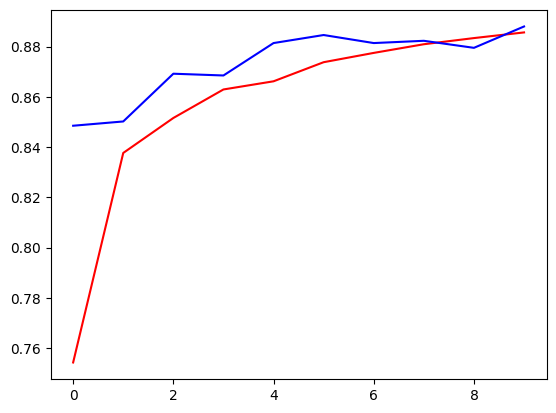

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color="red")
plt.plot(history.history["val_accuracy"],  color="blue")
plt.show()